### Simulate Stock Price

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
def fairCoinvsBiasedCoin(y):
    a = y.insert(0,0)
    y = np.array(y)
    Y = np.cumsum(y)
    return Y
y = [1,1,-1,-1,1,1,1,1,1,-1,1,-1,-1,-1,1,-1];
fairCoinvsBiasedCoin(y)

array([0, 1, 2, 1, 0, 1, 2, 3, 4, 5, 4, 5, 4, 3, 2, 3, 2])

In [26]:
def pathGenerator(nN, shape, scale, p, T, stock):
    # s_1: head-biased 
    # s_2: fair
    # s_3: tail-biased
    # p = [0.6, 0.38]
    
    S = [[p[0],1-p[0]],
         [0.5,0.5],
         [p[1],1-p[1]]]
   
    state = 2; # initialize state
    x = stock*np.ones((nN,1))
    
    lda = 90 # lamda = 180 for Possion distn
    regimeLength = np.random.poisson(lda)
    count = 0
    vol = np.random.uniform() # generate an uniform distribution
    
    for j in range(1,nN):
        
        if count == regimeLength:
            regimeLength = np.random.poisson(lda)
            count = 0
            vol = np.random.uniform()
        else:
            count += 1
        
        u = np.random.uniform()
        
        
        if state == 1:
            if u > float(T[state-1][0]):
                state = 2
        elif state == 2:
            if u < float(T[state-1][0]):
                state = 1
            elif u > float(T[state-1][0]) and u < float(T[state-1][1]):
                state = 2
            else:
                state = 3
        elif state == 3:
            if u > float(T[state-1][2]):
                state = 2
        #print('updated state is: '+ str(state))        
        
        u = np.random.uniform()
        #print(u)
        if u < float(S[state-1][0]):
            
            x[j] = vol*np.random.gamma(shape, scale)
        else:
            x[j] = -vol*np.random.gamma(shape, scale)
    #print(x)
    return np.cumsum(x)

In [27]:
def marketProxyModels(whichScenario, nN, stock):
    # which secenario
    scenario_dict = {}
    scenario_dict[1] = [0.6, 0.44]
    scenario_dict[2] = [0.6, 0.20]
    scenario_dict[3] = [0.7, 0.3]
    scenario_dict[4] = [0.9, 0.1]
    
    transP = scenario_dict[whichScenario]
    
    
    transP.append(transP[1])
    transP.append(transP[0])
    
    
    T = [[transP[0], 1.0-transP[0], 0.00],
     [transP[1], 1.0-(sum(transP[1:2])), transP[2]],
     [0.00  , 1.0-transP[2], transP[2]]]
    
    
    #print('successfully generate transP')
    shape = 0.5
    scale = 0.25
    
    p = [0.6, 0.38]
    return pathGenerator(nN, shape, scale, p, T, stock)
    

#marketProxyModels(1, 10) 

# Simulating stock returns using 3-coin methods

In [59]:
# define size of data
nYear = 60

# stock 1
test_1 = marketProxyModels(3, 252*nYear+1, 150) # 150 lamda:180
stock_sd = np.std(test_1)
stock_sd

# stock 2
test_2 = marketProxyModels(1, 252*nYear+1, 90)
stock_sd1 = np.std(test_2)
stock_sd1

4.859619547051313

In [60]:
import pandas as pd

In [61]:
#wt = np.diff(test_1)
wt = pd.DataFrame(test_1)
wt_pct = wt.pct_change()
df_pct = wt_pct.values
df_pct[0][0]=0
stock_rt = df_pct


### Simulate Stock Price

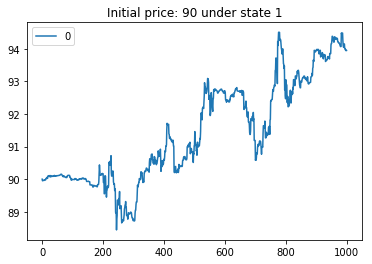

In [62]:
import pandas as pd

stock90_1 = marketProxyModels(1, 1000, 90)
stock90_2 = marketProxyModels(2, 1000, 90)
stock90_3 = marketProxyModels(3, 1000, 90)

df_test_1 = pd.DataFrame(stock90_1)
df_test_1.plot(title = 'Initial price: 90 under state 1')


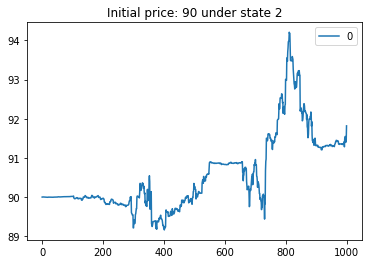

In [63]:
df_test_2 = pd.DataFrame(stock90_2)
df_test_2.plot(title = 'Initial price: 90 under state 2')


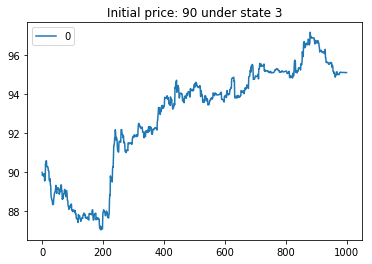

In [64]:
df_test_3 = pd.DataFrame(stock90_3)
df_test_3.plot(title = 'Initial price: 90 under state 3')


### Simulate Interest Rate
https://github.com/jamesmawm/Mastering-Python-for-Finance-source-codes/blob/master/B03898_05_Codes/vasicek.py

In [65]:
""" Simulate interest rate path by the Vasicek model """
import numpy as np

def vasicek(r0, K, theta, sigma, T=1., N=10, seed=777):    
    np.random.seed(seed)
    dt = T/float(N)    
    rates = [r0]
    for i in range(N):
        dr = K*(theta-rates[-1])*dt + sigma*np.random.normal()
        rates.append(rates[-1] + dr)
    return range(N+1), rates

#if __name__ == "__main__":
x, y = vasicek(0.01875, 0.20, 0.01, 0.012, 10., 252*nYear)


In [66]:
print(len(x))
print(test_1.shape)
print(test_2.shape)


15121
(15121,)
(15121,)


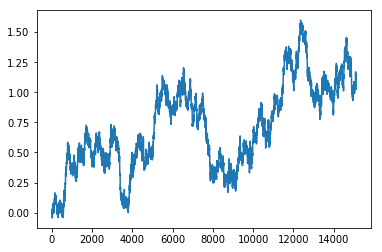

In [67]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()
#print(y)

In [68]:
import pandas as pd

In [69]:
#wt = np.diff(test_1)
wt = pd.DataFrame(test_1)
wt_pct = wt.pct_change()
df_pct = wt_pct.values
df_pct[0][0]=0
stock_ret = df_pct
stock_sd = np.std(test_1)

In [70]:
wt2 = pd.DataFrame(test_2)
wt2_pct = wt2.pct_change()
df_pct2 = wt2_pct.values
df_pct2[0][0]=0
stock_ret2 = df_pct2
stock_sd2 = np.std(test_2)

In [71]:
ir_wgt = pd.DataFrame(y)
ir_wgt_ = ir_wgt.pct_change()
ir_wgt_[0][0]=0
cash_ret = ir_wgt_
#cash_ret

In [72]:
#stock_cash = np.array([stock_ret,cash_ret])
stock_cash = np.concatenate((stock_ret,stock_ret2, cash_ret),axis=1)

In [73]:
std = np.std(stock_cash,axis=0)
sdMat = np.diag(np.std(stock_cash,axis=0))                         # Standard deviations 
corrMat = np.corrcoef(stock_cash.transpose())
#corrMat = np.reshape(np.corrcoef(stock_cash.transpose()),(3,3))   # Correlations
covMat = np.dot(sdMat, np.dot(corrMat, sdMat))                  # Covariance matrix (sd * corr * sd)

In [74]:
print(sdMat)
print(covMat)
print(covMat.shape)

[[0.000758   0.         0.        ]
 [0.         0.00141147 0.        ]
 [0.         0.         0.60865682]]
[[ 5.74567714e-07  1.64990408e-09 -3.35539944e-06]
 [ 1.64990408e-09  1.99225182e-06 -3.04341192e-06]
 [-3.35539944e-06 -3.04341192e-06  3.70463128e-01]]
(3, 3)


In [75]:
ev = np.linalg.eigvals(corrMat)                   # Eigenvalues of correlation matrix
if sum(n < 0 for n in ev):                        # If eigenvalues are negative then corrMat NOT PSD
    # print('*** Error: Correlation matrix is NOT Positive Semi-Definite (PSD)  ***')
    print('\033[1;31m*** Error: Correlation matrix is NOT Positive Semi-Definite (PSD)  ***\033[1;m]')
    print()
    print('Eigenvalues =', ev)
    print()

In [76]:
df_coins = pd.DataFrame(stock_cash).iloc[1:,:]

df_coins.to_csv('returns_coins.csv')
#df_coins.to_csv('merge_weight_test.csv')


In [77]:
df_coins.shape

(15120, 3)